## Churn Project Submission

* Student name: Kregg Jackson 
* Student pace: self paced
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://medium.com/@kr3ggjac.cj/data-science-effect-on-professional-sports-b11d3dc3e350


# Customer Churn Analysis

## Project Goal
Tell stakeholder's which feature has the greatest effect on whether or not a customer will churn.

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/kregg/dsc-phase-3-project/data/bigml_59c28831336c6604c800002a.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## EDA

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

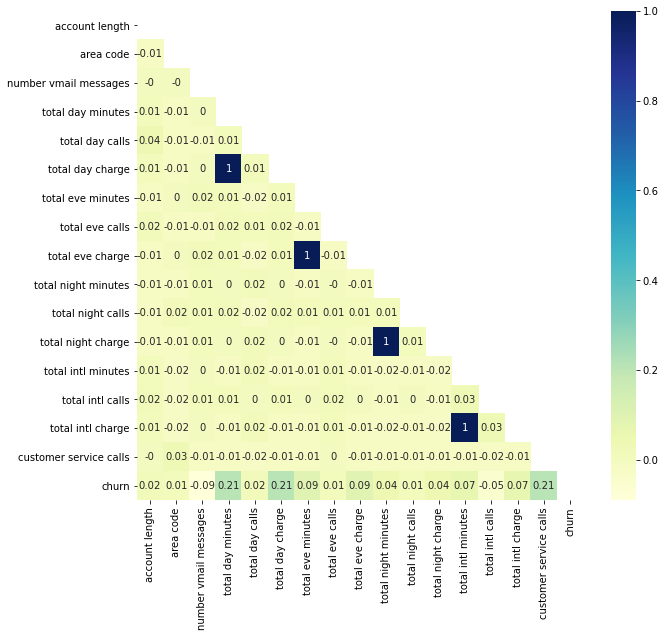

In [6]:
corrchurn = df.corr().round(2)
mask = np.zeros_like(corrchurn)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(10,9))
sns.heatmap(corrchurn,annot=True,cmap="YlGnBu",mask=mask);

The heatmap is reporting strong correlation between the `total day minutes` and `total day charge` columns. This is likely due to customers being charged for how many minutes they use. This is also true for `total eve charge`, `total night charge`, and `total intl charge` in relation to the total minutes data. The features with the highest correlation to churn are `total day minutes`, `total day charge`, and `customer service calls`.

False    0.855086
True     0.144914
Name: churn, dtype: float64


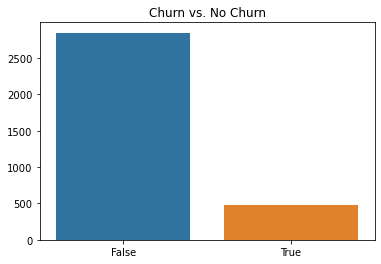

In [7]:
y = df["churn"].value_counts()
print(df["churn"].value_counts(normalize=True))
plt.title('Churn vs. No Churn')
sns.barplot(x=y.index,y=y.values);

There is class imbalance on the dependent variable churn data. It is much more common for customers to keep their subscription than to cancel. This can make the models biased and make it more likely for the model to predict the majority class which in this case is false. This will need to be corrected either by oversampling, a class weight function, or cross validation.

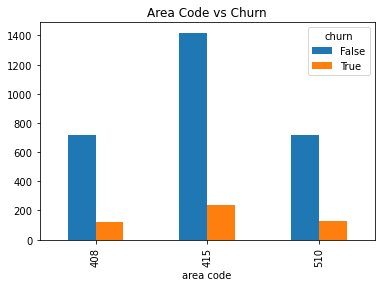

In [8]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=False)
plt.title('Area Code vs Churn');

The proportion of churn for customers appears about the same no matter what area code.

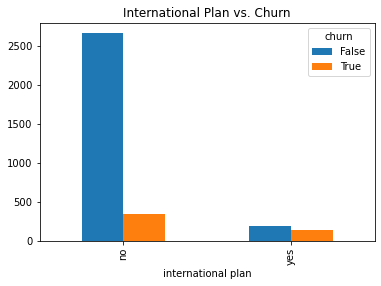

In [9]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False)
plt.title('International Plan vs. Churn');

The proportion of churn for customers that have the international plan is much higher than the proportion of churn for customers without the plan.

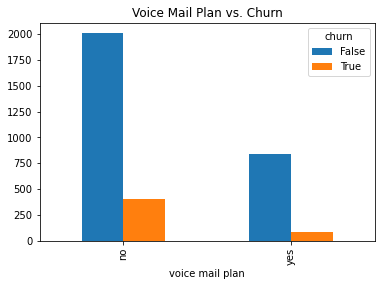

In [10]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=False)
plt.title('Voice Mail Plan vs. Churn');

The proportion of whether a customer will cancel their subsicription appears about the same no matter if the customer has a voice mail plan or not.

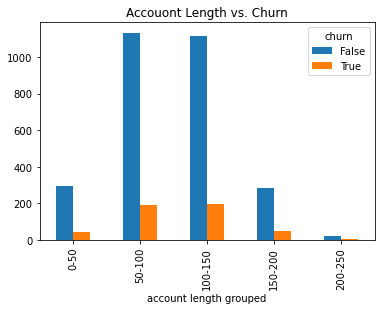

In [11]:
df['account length grouped'] = pd.cut(df["account length"], bins = [0,50,100,150,200,250], 
                                      labels=['0-50', '50-100', '100-150', '150-200', '200-250'])
df.groupby(["account length grouped", "churn"]).size().unstack().plot(kind='bar',stacked=False)
plt.title('Accouont Length vs. Churn');

Once customers have had their account for more than 150 days or less than 50 days it appears more likely that they will churn compared to customers with account lengths between 50-150 days.

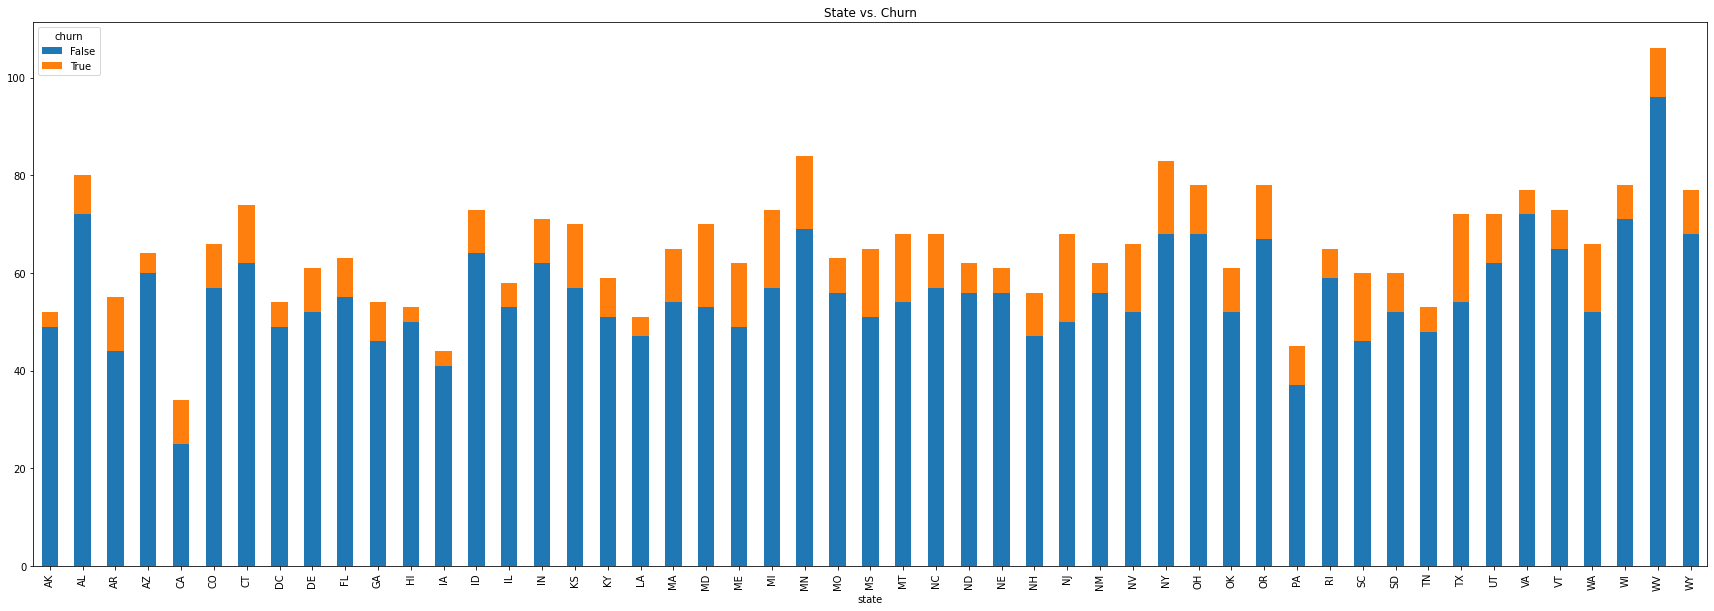

In [12]:
df.groupby(['state', 'churn']).size().unstack().plot(kind='bar', stacked = True,figsize=(30,10))
plt.title('State vs. Churn');

Some states have a smaller proportion of customers with churn (AK) and some have a larger portion of customers who will churn (TX). This shows that we should include state data in the further analysis because it could be help to predict if a customer is going to churn.

### Label encode categorical columns

In [13]:
label_encoder = preprocessing.LabelEncoder()

In [14]:
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df.dtypes

state                        int64
account length               int64
area code                    int64
phone number                object
international plan           int64
voice mail plan              int64
number vmail messages        int64
total day minutes          float64
total day calls              int64
total day charge           float64
total eve minutes          float64
total eve calls              int64
total eve charge           float64
total night minutes        float64
total night calls            int64
total night charge         float64
total intl minutes         float64
total intl calls             int64
total intl charge          float64
customer service calls       int64
churn                         bool
account length grouped    category
dtype: object

In [15]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,account length grouped
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,100-150
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,100-150
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,100-150
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,50-100
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,50-100


## Train-Test Split

In [16]:
y=df['churn']
x =df.drop(['phone number','account length grouped', 'churn'], axis = 1, inplace = False)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=42)

### Confusion matrices, ROC plots, and classification repotrts of various models

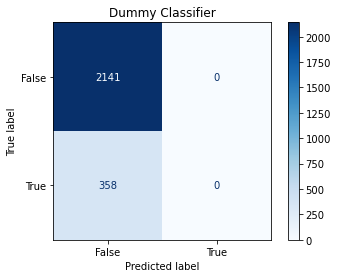

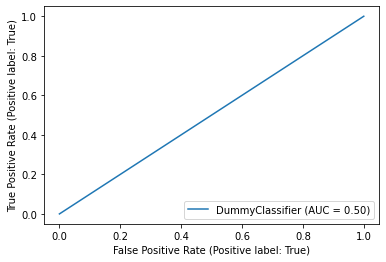

In [18]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
metrics.plot_confusion_matrix(dummy,x_train,y_train,cmap='Blues')
title = 'Dummy Classifier'
plt.title(title)
plt.show

metrics.plot_roc_curve(dummy, x_train, y_train)
plt.show();

Dummy classifier model sets the baseline for the more advanced models. The dummy classifier always picks the most frequent class label in the data. 

In [19]:
#class_weight parameters
params = dict(fit_intercept=False, C=1e12, solver='liblinear')

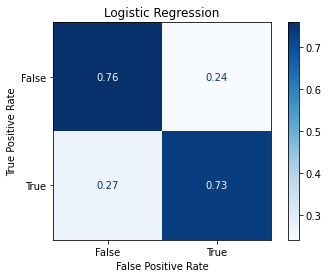

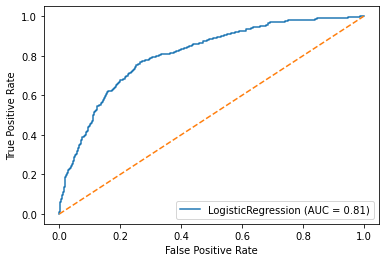

In [20]:
#Logistic Regression
clf_log = LogisticRegression(class_weight='balanced', **params)
clf_log.fit(x_train, y_train)


metrics.plot_confusion_matrix(clf_log,x_train,y_train,cmap='Blues',
                             normalize='true')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
title = 'Logistic Regression'
plt.title(title)
plt.show

metrics.plot_roc_curve(clf_log, x_train, y_train)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [21]:
y_pred = clf_log.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print('TRAIN CLASSIFICATION REPORT:')
print(classification_report(y_train, y_pred))

[[1622  519]
 [  97  261]]
TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.94      0.76      0.84      2141
        True       0.33      0.73      0.46       358

    accuracy                           0.75      2499
   macro avg       0.64      0.74      0.65      2499
weighted avg       0.86      0.75      0.79      2499



In [22]:
y_pred = clf_log.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('CLASSIFICATION REPORT:')
print(classification_report(y_test, y_pred))

[[547 162]
 [ 28  97]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.95      0.77      0.85       709
        True       0.37      0.78      0.51       125

    accuracy                           0.77       834
   macro avg       0.66      0.77      0.68       834
weighted avg       0.86      0.77      0.80       834



The logistic regression model has a small bias towards predicting no churn. The model is doing a poor job of predicting the customers who will actually churn. The low recall on churn prediction is likely due to the class imbalance because the model is over valuing the no churn data. I will try to correct the imbalance with SMOTE. 

In [23]:
#SMOTE
oversample = SMOTE()
x_train_smote, y_train_smote = oversample.fit_resample(x_train, y_train)
y_train_smote.value_counts()

True     2141
False    2141
Name: churn, dtype: int64

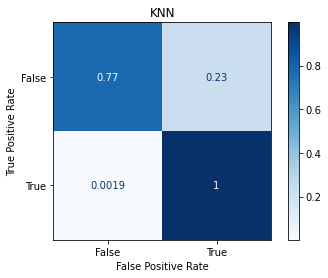

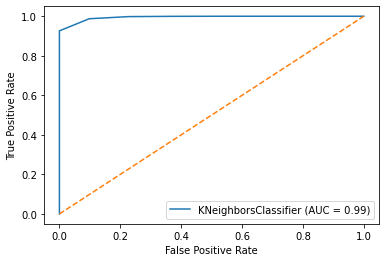

In [24]:
#K Nearest Neighbors
clf_knn = KNeighborsClassifier()
clf_knn.fit(x_train_smote, y_train_smote)
metrics.plot_confusion_matrix(clf_knn,x_train_smote,y_train_smote,cmap='Blues',
                             normalize='true')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
title = 'KNN'
plt.title(title)
plt.show

metrics.plot_roc_curve(clf_knn, x_train_smote, y_train_smote)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [25]:
y_pred = clf_knn.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print('TRAIN CLASSIFICATION REPORT:')
print(classification_report(y_train, y_pred))

[[1655  486]
 [   2  356]]
TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       1.00      0.77      0.87      2141
        True       0.42      0.99      0.59       358

    accuracy                           0.80      2499
   macro avg       0.71      0.88      0.73      2499
weighted avg       0.92      0.80      0.83      2499



In [26]:
y_pred = clf_knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('CLASSIFICATION REPORT:')
print(classification_report(y_test, y_pred))

[[467 242]
 [ 52  73]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.90      0.66      0.76       709
        True       0.23      0.58      0.33       125

    accuracy                           0.65       834
   macro avg       0.57      0.62      0.55       834
weighted avg       0.80      0.65      0.70       834



SMOTE does not seem to have done much as the KNN classifier is also biased towards no churn. The classifier looks to be overfit, the accuracy drops from 80% in the train data to 65% in the test set. This is not good becuase overfit classifiers will not be able to identify the minority no churn class and the classifier will perform worse as more new data is introduced. 

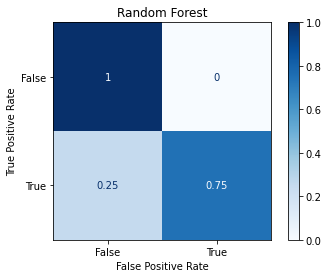

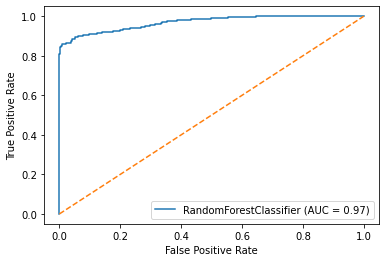

In [27]:
#Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, max_depth= 7)
clf_rf.fit(x_train, y_train)
metrics.plot_confusion_matrix(clf_rf,x_train,y_train,cmap='Blues',
                             normalize='true')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
title = 'Random Forest'
plt.title(title)
plt.show

metrics.plot_roc_curve(clf_rf, x_train, y_train)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [28]:
#Grid search on Random Forest model
param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 7, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}
grid_search = GridSearchCV(clf_rf, param_grid, cv=3)
grid_search.fit(x_train, y_train)
print(f"Training Accuracy: {grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {grid_search.best_params_}")

Training Accuracy: 94.56%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [29]:
y_pred = clf_rf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print('TRAIN CLASSIFICATION REPORT:')
print(classification_report(y_train, y_pred))

[[2141    0]
 [  90  268]]
TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      2141
        True       1.00      0.75      0.86       358

    accuracy                           0.96      2499
   macro avg       0.98      0.87      0.92      2499
weighted avg       0.97      0.96      0.96      2499



In [30]:
y_pred = clf_rf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('CLASSIFICATION REPORT:')
print(classification_report(y_test, y_pred))

[[708   1]
 [ 50  75]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.93      1.00      0.97       709
        True       0.99      0.60      0.75       125

    accuracy                           0.94       834
   macro avg       0.96      0.80      0.86       834
weighted avg       0.94      0.94      0.93       834



The confusion matrix shows that the Random Forest classifier has a bias towards predicting no churn. This is not desirable because I don't want to miss out on the churn customers. I ran gridsearch to find the best parameters and it did in fact strengthen the accuracy however this classifer is also struggling to identify the customers who actually churn.

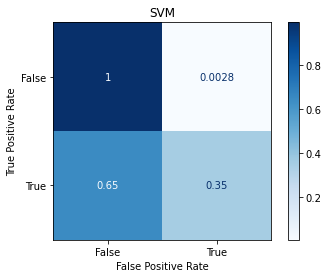

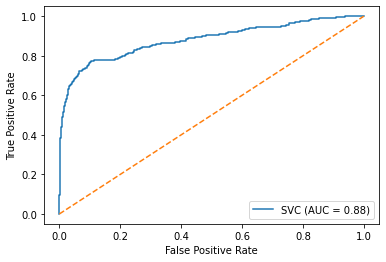

In [31]:
#Support Vector Machine
clf_svm = SVC(kernel='rbf', C=1000)
clf_svm.fit(x_train, y_train)
metrics.plot_confusion_matrix(clf_svm,x_train,y_train,cmap='Blues',
                             normalize='true')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
title = 'SVM'
plt.title(title)
plt.show

metrics.plot_roc_curve(clf_svm, x_train, y_train)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [32]:
y_pred = clf_svm.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print('TRAIN CLASSIFICATION REPORT:')
print(classification_report(y_train, y_pred))

[[2135    6]
 [ 232  126]]
TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95      2141
        True       0.95      0.35      0.51       358

    accuracy                           0.90      2499
   macro avg       0.93      0.67      0.73      2499
weighted avg       0.91      0.90      0.89      2499



In [33]:
y_pred = clf_svm.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('CLASSIFICATION REPORT:')
print(classification_report(y_test, y_pred))

[[705   4]
 [ 80  45]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94       709
        True       0.92      0.36      0.52       125

    accuracy                           0.90       834
   macro avg       0.91      0.68      0.73       834
weighted avg       0.90      0.90      0.88       834



The SVM classifier is biased to predicting the majority class no churn. The model has high precision scores but low recall for churn this likely means the classifier is accurate and oftens predicts right overall but it is poor at identifying the few churn customers.

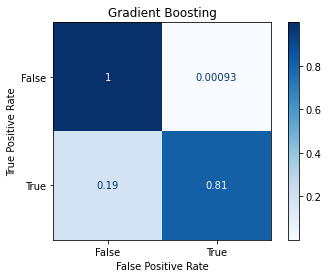

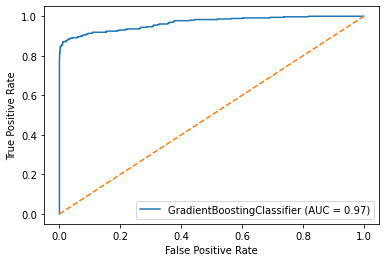

In [34]:
#Gradient Boosting
clf_gbc = ensemble.GradientBoostingClassifier(random_state=42)
clf_gbc.fit(x_train, y_train)
metrics.plot_confusion_matrix(clf_gbc,x_train,y_train,cmap='Blues',
                             normalize='true')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
title = 'Gradient Boosting'
plt.title(title)
plt.show

metrics.plot_roc_curve(clf_gbc, x_train, y_train)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [35]:
y_pred = clf_gbc.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print('TRAIN CLASSIFICATION REPORT:')
print(classification_report(y_train, y_pred))

[[2139    2]
 [  67  291]]
TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98      2141
        True       0.99      0.81      0.89       358

    accuracy                           0.97      2499
   macro avg       0.98      0.91      0.94      2499
weighted avg       0.97      0.97      0.97      2499



In [36]:
y_pred = clf_gbc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('CLASSIFICATION REPORT:')
print(classification_report(y_test, y_pred))

[[701   8]
 [ 38  87]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       709
        True       0.92      0.70      0.79       125

    accuracy                           0.94       834
   macro avg       0.93      0.84      0.88       834
weighted avg       0.94      0.94      0.94       834



The gradient boosting classifier has some bias to predicting no churn but not as much as the SVM model or the other classifiers. The results are prettty good by misclassifying only a few test samples. The high recall score in the classification report indicates this is the best trained classifier at identifying the actual customers who wil churn.

### Gradient Boosting Feature Importance

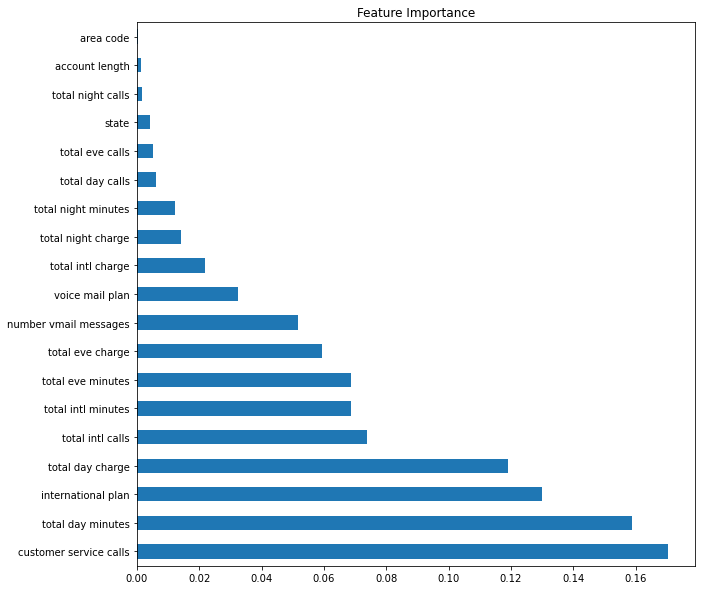

In [43]:
feature_importance = clf_gbc.feature_importances_
feat_importances = pd.Series(clf_gbc.feature_importances_, 
                             index=x.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10))
plt.title('Feature Importance');

The most important feature for the Gradient Boosting classifier are are `customer service calls`, `total day minutes`, and `international plan`. Other important features are if the user has an international plan and the total international calls


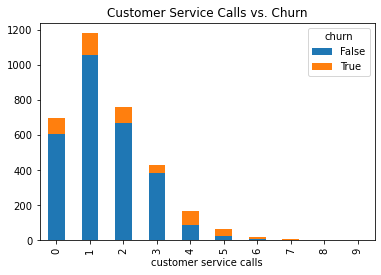

In [38]:
df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=True)
plt.title('Customer Service Calls vs. Churn'); 

Almost half of the customers who opt in for the international plan will cancel their subscription. The correlation could be due to the international services being overpriced I advise reducing the price of the international plan.

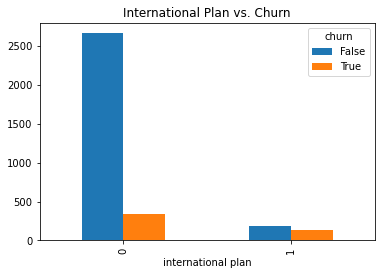

In [39]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False)
plt.title('International Plan vs. Churn');

Almost half of the customers who opt in for the international plan will cancel their subscription. The correlation could be due to the international services being overpriced I advise reducing the price of the international plan.

In [40]:
df['total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total day minutes, dtype: float64

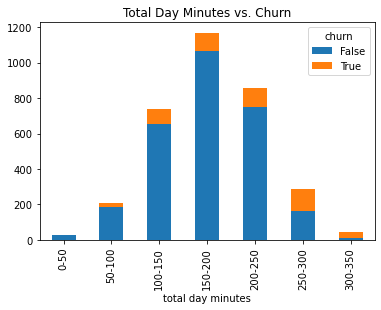

In [41]:
df['total day minutes'] = pd.cut(df["total day minutes"], bins = [0,50,100,150,200,250,300,350], 
                                      labels=['0-50', '50-100', '100-150', '150-200', '200-250','250-300','300-350'])
df.groupby(["total day minutes", "churn"]).size().unstack().plot(kind='bar', stacked=True)
plt.title('Total Day Minutes vs. Churn');

When customer pass 250 minutes per day it is much more likely they end their subscription. Customers who use this many minutes may feel the plans available don’t suit them, I’d suggest adding an unlimited minutes phone plan option.

# Conclusion

* The most important features are `customer service calls`, `total day_minutes`, and `international plan`.

* The gradient boosting model reported `customer service calls` was the most important factor whether a customer will churn, I think this is due to frustration with the customer service department. I recommend the phone company invest in improving the customer service department. 

* Almost half of the customers who opt in for the international plan will cancel their subscription. The correlation could be due to the international services being overpriced I advise reducing the price of the international plan.

* When customer pass 250 minutes per day it is much more likely they end their subscription. Customers who use this many minutes may feel the plans available don’t suit them, I’d suggest adding an unlimited minutes phone plan option.


### Next Steps

* Additional analysis could provide further insights into how to improve likelihood of renovation success.

* I could run cross validation on the churn data to correct the class imbalance differently and see if that is more accurate than class weight and SMOTE.

* Remove more redundant columns the `total day charge` and `total day minutes` columns are too correlated.

